In [1]:
from masspred_system import two_planet_system, np, plt
import radvalley_definitions as rvdef
%matplotlib inline

In [2]:
# define Kepler-36 planetary system
kep36 = 0
if kep36:
    N = 100
    Xiron_samp = np.random.normal(1/3,.02,N)
    Xiron_samp = Xiron_samp[Xiron_samp>=0]

    tps = two_planet_system(rvdef.define_radval_simple, N, label='Kep36')
    tps.add_star(np.random.normal(1.071,.043,N), np.random.normal(1.626,.019,N), np.random.normal(5911,66,N))
    tps.add_planet(13.83989, np.random.normal(1.486,.035,N), np.random.normal(4.45,.3,N), Xiron_samp)
    tps.add_planet(16.23855, np.random.normal(3.679,.054,N), np.random.normal(8.08,.55,N), Xiron_samp)
    #tps.add_star(1.071, 1.626, 5911)
    #tps.add_planet(13.83989, 1.486, 4.45, 1/3)
    #tps.add_planet(16.23855, 3.679, 8.08, 1/3)

In [2]:
# define LTT 3780 planetary system
ltt3780 = 1
if ltt3780:
    N = 100
    Xiron_samp = np.random.normal(1/3,.02,N)

    tps = two_planet_system(rvdef.define_radval_lowmassstar, N, label='ltt3780')
    tps.add_star(np.random.normal(.401,.012,N), np.random.normal(.374,.011,N), np.random.normal(3331,157,N))
    tps.add_planet(.77, np.random.normal(1.33,.075,N), np.random.normal(3.12,.5,N), Xiron_samp, radval_args=[.77])
    tps.add_planet(12.25, np.random.normal(2.3,.16,N), np.random.normal(8.5,1.65,N), Xiron_samp, radval_args=[12.25])

## test photoevaporation scenario

In [3]:
tps.compute_Mgas_min_photoevaporation(value_errors=False, size=100)


Computing the gaseous planet's minimum mass under photoevaporation (100 realizations)



/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:81: RuntimeWarning: divide by zero encountered in log10
  DR_solution = 10**float(fsolve(_solve_Rrcb, np.log10(DR_guess), args=args))
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:56: RuntimeWarning: invalid value encountered in true_divide
  I2_I1 = I2/I1
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  rhorcb *= (3*kappa0 * Mearth2g(Mcore)*Xenv)**(-a)


Time elapsed = 286.9 seconds (4.78 minutes).



/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Gaseous planet measured mass = 8.235 + 1.290 - 1.692 Earth masses
Gaseous planet minimum mass = 0.182 + 0.016 - 0.016 Earth masses
Photoevaporation consistency rate = 1.000
Photoevaporation model success rate = 1.000


/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


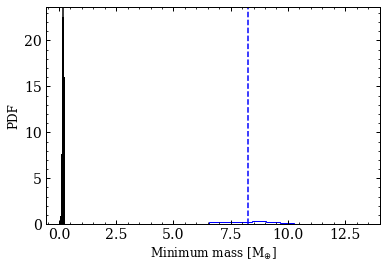

In [4]:
# plot results
mppost = np.random.randn(1000)*tps.planet_gaseous.mass[1] + tps.planet_gaseous.mass[0]
_=plt.hist(mppost, bins=15, histtype='step', color='b', normed=1)
p=plt.hist(tps.photoevaporation.planet_gaseous.Mmin_solution_samples, bins=15, normed=1, histtype='step', color='k', lw=2)
plt.xlabel('Minimum mass [M$_{\oplus}$]', fontsize=12), plt.ylabel('PDF', fontsize=12)
plt.axvline(tps.photoevaporation.planet_gaseous.Mmin_solution[0], color='k')
plt.axvline(tps.photoevaporation.planet_gaseous.mass[0], ls='--', color='b')
plt.fill_between([tps.photoevaporation.planet_gaseous.Mmin_solution[0]-tps.photoevaporation.planet_gaseous.Mmin_solution[2],
                  tps.photoevaporation.planet_gaseous.Mmin_solution[0]+tps.photoevaporation.planet_gaseous.Mmin_solution[1]], 0, 1, alpha=.5)
print('Gaseous planet measured mass = %.3f + %.3f - %.3f Earth masses'%(tps.planet_gaseous.mass))
print('Gaseous planet minimum mass = %.3f + %.3f - %.3f Earth masses'%(tps.photoevaporation.planet_gaseous.Mmin_solution))
print('Photoevaporation consistency rate = %.3f'%tps.photoevaporation.planet_gaseous.frac_consistent_photoevap)
print('Photoevaporation model success rate = %.3f'%tps.photoevaporation.planet_gaseous.frac_success_photoevap)

## test core-powered mass loss scenario

In [5]:
tps.compute_Mgas_min_corepoweredmassloss(value_errors=False, size=100)


Computing the gaseous planet's minimum mass under core-powered mass loss (100 realizations)



Time elapsed = 710.7 seconds (11.85 minutes).


Gaseous planet measured mass = 8.235 + 1.290 - 1.692 Earth masses
Gaseous planet minimum mass = 1.594 + 0.250 - 0.196 Earth masses
Core-powered mass loss consistency rate = 1.000
Core-powered mass loss model success rate = 0.780


/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


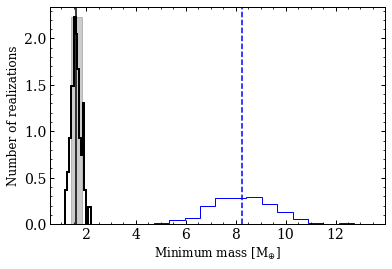

In [6]:
# plot results
_=plt.hist(mppost, bins=15, histtype='step', color='b', normed=1)
p=plt.hist(tps.corepoweredmassloss.planet_gaseous.Mmin_solution_samples, bins=15, histtype='step', color='k', lw=2, normed=1)
plt.xlabel('Minimum mass [M$_{\oplus}$]', fontsize=12), plt.ylabel('Number of realizations', fontsize=12)
plt.axvline(tps.corepoweredmassloss.planet_gaseous.Mmin_solution[0], color='k')
plt.axvline(tps.corepoweredmassloss.planet_gaseous.mass[0], ls='--', color='b')
plt.fill_between([tps.corepoweredmassloss.planet_gaseous.Mmin_solution[0]-tps.corepoweredmassloss.planet_gaseous.Mmin_solution[2],
                  tps.corepoweredmassloss.planet_gaseous.Mmin_solution[0]+tps.corepoweredmassloss.planet_gaseous.Mmin_solution[1]], 0, p[0].max(), color='k', alpha=.2)
print('Gaseous planet measured mass = %.3f + %.3f - %.3f Earth masses'%(tps.planet_gaseous.mass))
print('Gaseous planet minimum mass = %.3f + %.3f - %.3f Earth masses'%(tps.corepoweredmassloss.planet_gaseous.Mmin_solution))
print('Core-powered mass loss consistency rate = %.3f'%tps.corepoweredmassloss.planet_gaseous.frac_consistent_corepoweredmassloss)
print('Core-powered mass loss model success rate = %.3f'%tps.corepoweredmassloss.planet_gaseous.frac_success_corepoweredmassloss)

## test gas-poor formation scenario

In [7]:
tps.compute_Mgas_min_gaspoorformation(value_errors=False, size=100)


Computing the gaseous planet's minimum mass under gas-poor formation (100 realizations)



Time elapsed = 5.0 seconds (0.08 minutes).


/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Gaseous planet measured mass = 8.235 + 1.290 - 1.692 Earth masses
Gaseous planet minimum mass = 9.515 + 1.356 - 1.841 Earth masses
Gas-poor formation consistency rate = 0.360


AttributeError: 'planet' object has no attribute 'frac_succes_gaspoorformation'

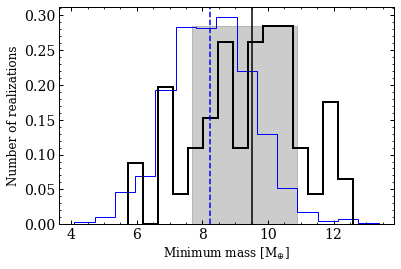

In [8]:
# plot results
_=plt.hist(mppost, bins=15, histtype='step', color='b', normed=1)
p=plt.hist(tps.gaspoorformation.planet_gaseous.Mmin_solution_samples, bins=15, normed=1, histtype='step', color='k', lw=2)
plt.xlabel('Minimum mass [M$_{\oplus}$]', fontsize=12), plt.ylabel('Number of realizations', fontsize=12)
plt.axvline(tps.gaspoorformation.planet_gaseous.Mmin_solution[0], color='k')
plt.axvline(tps.gaspoorformation.planet_gaseous.mass[0], ls='--', color='b')
plt.fill_between([tps.gaspoorformation.planet_gaseous.Mmin_solution[0]-tps.gaspoorformation.planet_gaseous.Mmin_solution[2],
                  tps.gaspoorformation.planet_gaseous.Mmin_solution[0]+tps.gaspoorformation.planet_gaseous.Mmin_solution[1]], 0, p[0].max(), color='k', alpha=.2)
print('Gaseous planet measured mass = %.3f + %.3f - %.3f Earth masses'%(tps.planet_gaseous.mass))
print('Gaseous planet minimum mass = %.3f + %.3f - %.3f Earth masses'%(tps.gaspoorformation.planet_gaseous.Mmin_solution))
print('Gas-poor formation consistency rate = %.3f'%tps.gaspoorformation.planet_gaseous.frac_consistent_gaspoorformation)
print('Gas-poor formation model success rate = %.3f'%tps.gaspoorformation.planet_gaseous.frac_succes_gaspoorformation)